# Customer churn is when a company’s customers stop doing business with that company.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('customer_churn_prediction.csv')
df=pd.DataFrame(data=df)

In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Data compises of Services — which services the customer subscribed to (internet, phone, cable, etc.), Monthly bill total, Tenure — How long they had been a customer, Basic demographic info — whether they were elderly, had dependents, etc

In [4]:
df.shape #this has 21 column and 7043 rows in dataset

(7043, 21)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.info() #column detail

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# checking and treating missing values

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

there are no missing values

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
df.loc[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",np.nan)

In [12]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [14]:
df["TotalCharges"]=df["TotalCharges"].fillna(np.mean(df["TotalCharges"]))

In [15]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df_visualization_nominal=df[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
                            'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                             'Contract','PaperlessBilling','PaymentMethod','Churn']].copy()

In [17]:
df_visualization_nominal.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

# Visualization of Data

Male      3555
Female    3488
Name: gender, dtype: int64


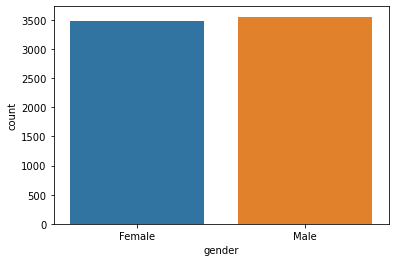

In [18]:
ax=sns.countplot(x='gender',data=df_visualization_nominal)
print(df_visualization_nominal['gender'].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


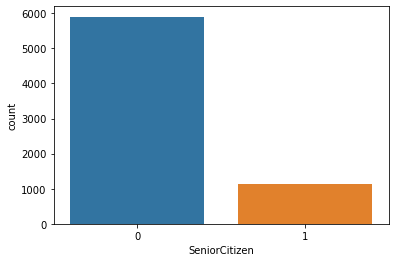

In [19]:
ax=sns.countplot(x='SeniorCitizen',data=df_visualization_nominal)
print(df_visualization_nominal['SeniorCitizen'].value_counts())

No     3641
Yes    3402
Name: Partner, dtype: int64


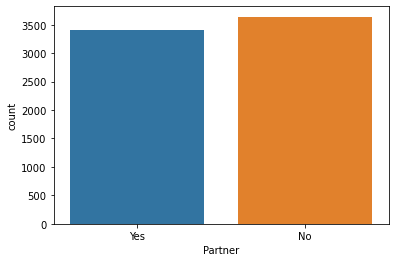

In [20]:
ax=sns.countplot(x='Partner',data=df_visualization_nominal)
print(df_visualization_nominal['Partner'].value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64


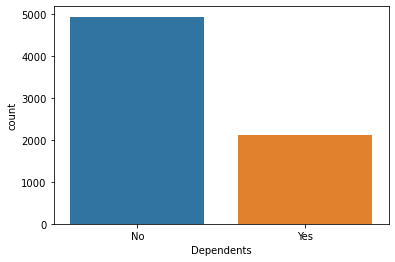

In [21]:
ax=sns.countplot(x='Dependents',data=df_visualization_nominal)
print(df_visualization_nominal['Dependents'].value_counts())

Yes    6361
No      682
Name: PhoneService, dtype: int64


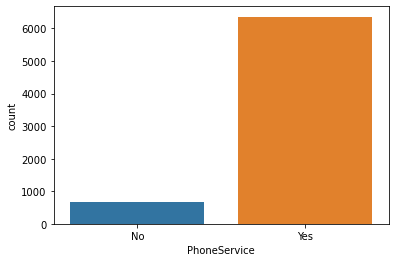

In [22]:
ax=sns.countplot(x='PhoneService',data=df_visualization_nominal)
print(df_visualization_nominal['PhoneService'].value_counts())

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


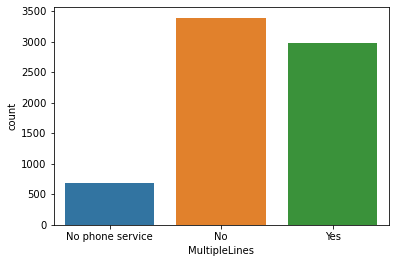

In [23]:
ax=sns.countplot(x='MultipleLines',data=df_visualization_nominal)
print(df_visualization_nominal['MultipleLines'].value_counts())

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


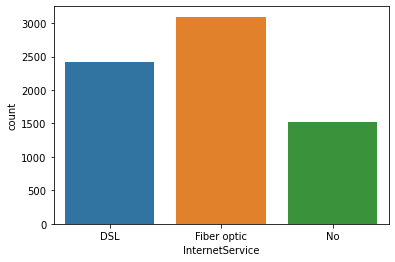

In [24]:
ax=sns.countplot(x='InternetService',data=df_visualization_nominal)
print(df_visualization_nominal['InternetService'].value_counts())

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


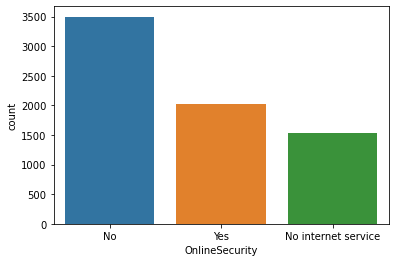

In [25]:
ax=sns.countplot(x='OnlineSecurity',data=df_visualization_nominal)
print(df_visualization_nominal['OnlineSecurity'].value_counts())

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


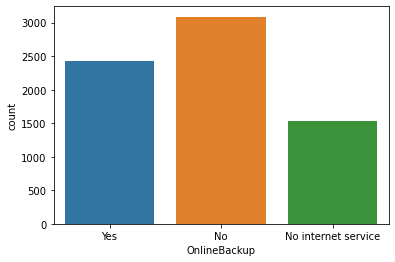

In [26]:
ax=sns.countplot(x='OnlineBackup',data=df_visualization_nominal)
print(df_visualization_nominal['OnlineBackup'].value_counts())

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


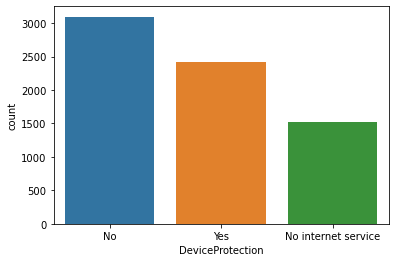

In [27]:
ax=sns.countplot(x='DeviceProtection',data=df_visualization_nominal)
print(df_visualization_nominal['DeviceProtection'].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


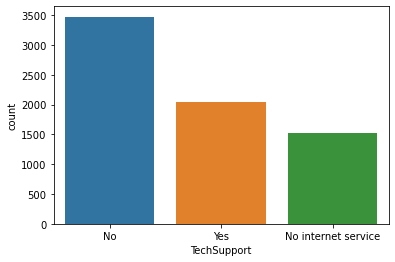

In [28]:
ax=sns.countplot(x='TechSupport',data=df_visualization_nominal)
print(df_visualization_nominal['TechSupport'].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


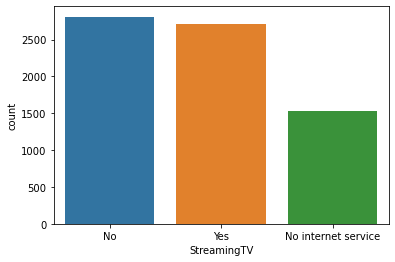

In [29]:
ax=sns.countplot(x='StreamingTV',data=df_visualization_nominal)
print(df_visualization_nominal['StreamingTV'].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


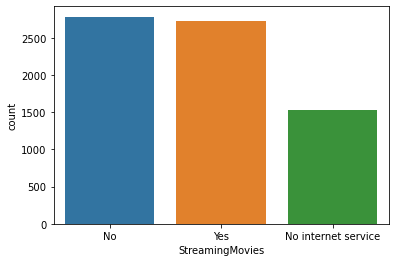

In [30]:
ax=sns.countplot(x='StreamingMovies',data=df_visualization_nominal)
print(df_visualization_nominal['StreamingMovies'].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


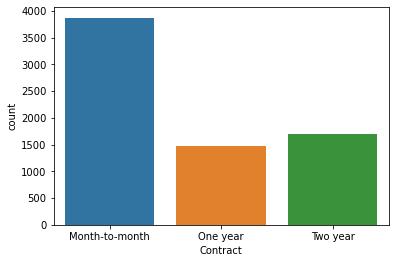

In [31]:
ax=sns.countplot(x='Contract',data=df_visualization_nominal)
print(df_visualization_nominal['Contract'].value_counts())

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


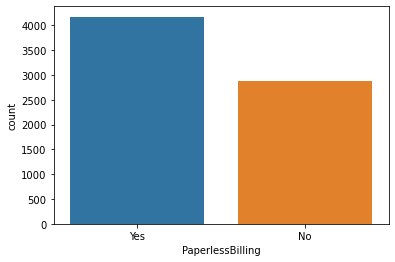

In [32]:
ax=sns.countplot(x='PaperlessBilling',data=df_visualization_nominal)
print(df_visualization_nominal['PaperlessBilling'].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


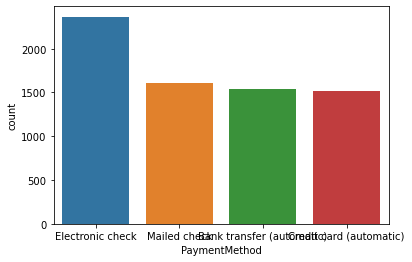

In [33]:
ax=sns.countplot(x='PaymentMethod',data=df_visualization_nominal)
print(df_visualization_nominal['PaymentMethod'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


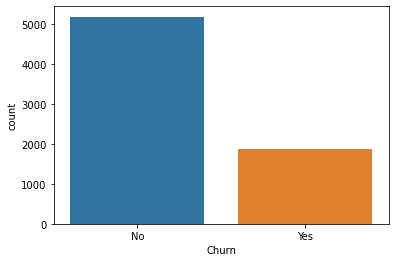

In [34]:
ax=sns.countplot(x='Churn',data=df_visualization_nominal)
print(df_visualization_nominal['Churn'].value_counts())

In [35]:
df_visualization_ordinal=df[["customerID","tenure"]].copy()

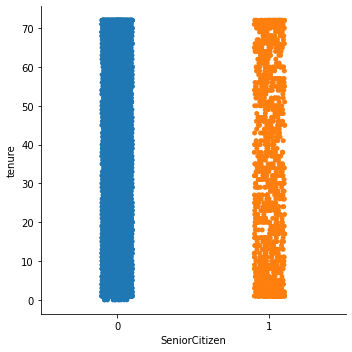

In [36]:
sns.catplot(x="SeniorCitizen",y="tenure",data=df)

In [37]:
df_visualization_continous=df[["MonthlyCharges","TotalCharges"]].copy()

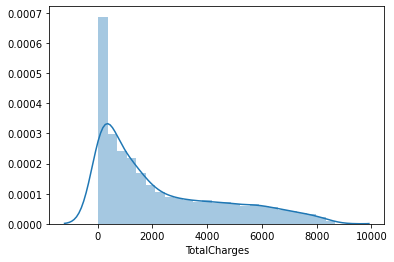

In [38]:
sns.distplot(df_visualization_continous['TotalCharges'],kde=True)

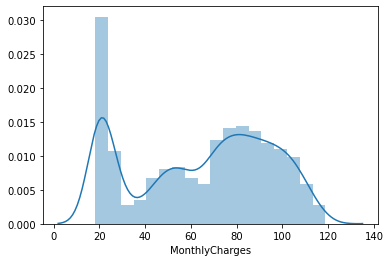

In [39]:
sns.distplot(df_visualization_continous['MonthlyCharges'],kde=True)

# Encoding of DataFrame

In [40]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [41]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [42]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [43]:
#describe the data set
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


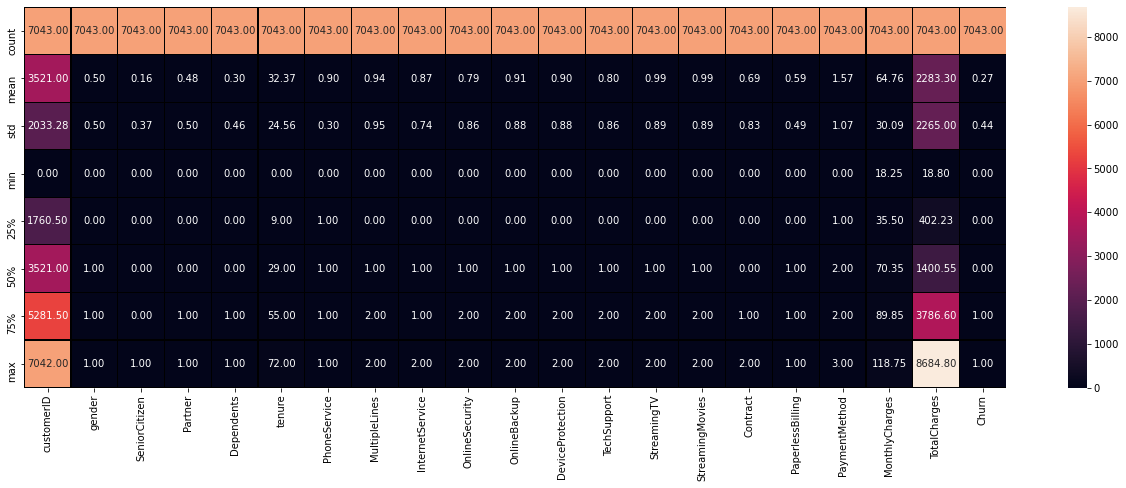

In [44]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.1,linecolor='black',fmt="0.2f")

In [45]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000270,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309


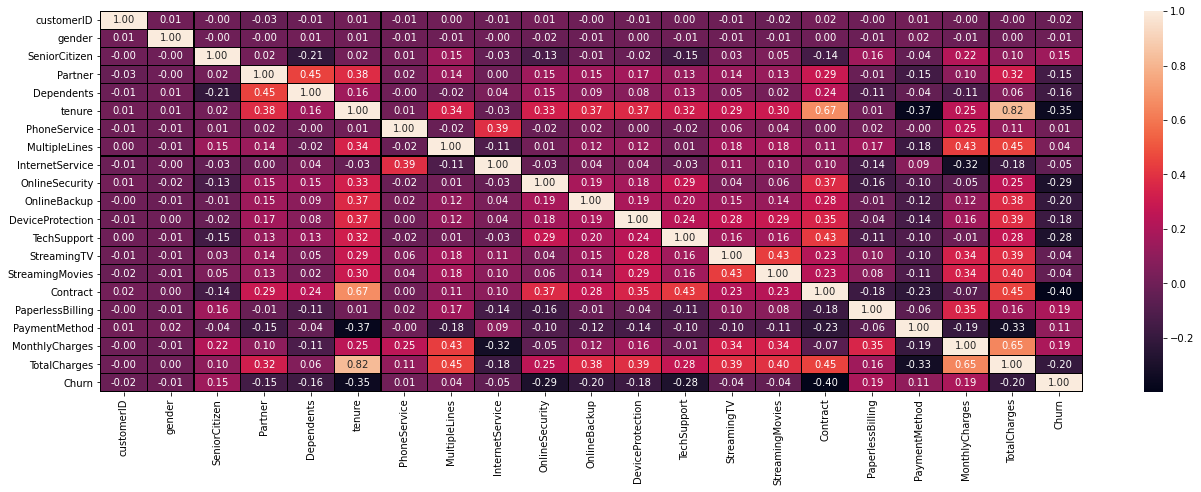

In [46]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor='black',fmt="0.2f")

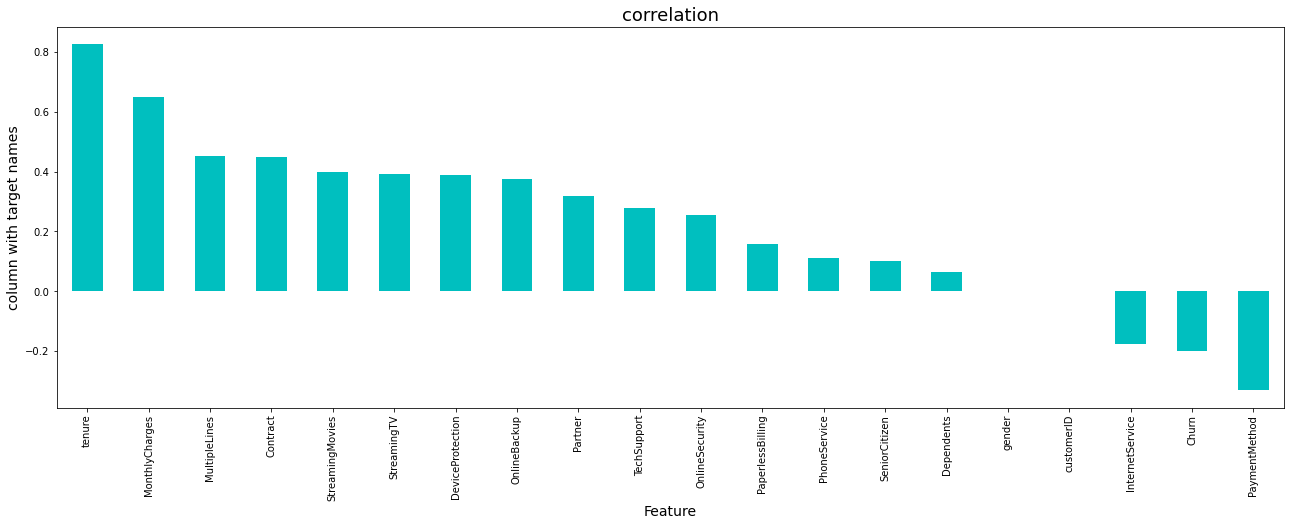

In [47]:
plt.figure(figsize=(22,7))
df.corr()['TotalCharges'].sort_values(ascending=False).drop(['TotalCharges']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [48]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

keeping +/-0.5 as the range for skewness 


since no column has skewness we will not treat that

checkingt the outliers

In [49]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

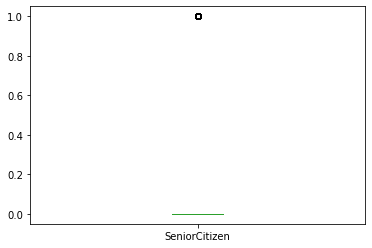

In [50]:
df['SeniorCitizen'].plot.box()

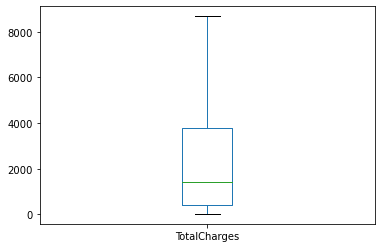

In [51]:
df['TotalCharges'].plot.box()

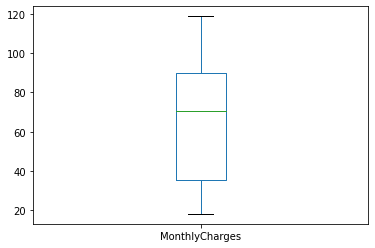

In [52]:
df['MonthlyCharges'].plot.box()

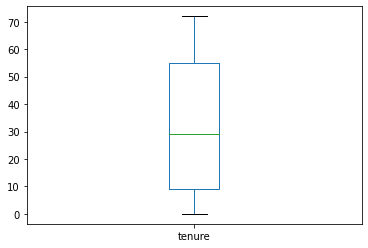

In [53]:
df['tenure'].plot.box()

In [54]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

since the column senior citizen is nominal type, we cannot consider it data point as outlier

In [55]:
df.shape

(7043, 21)

In [56]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [57]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1949.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758.0,0.0,0,0.0,0.0,72,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,0.0,21.15,1419.40,0.0
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [58]:
df_new_z.shape

(6361, 21)

In [59]:
#percentage loss of data
data_loss=((7043-6361)/7043)*100

In [60]:
data_loss

9.683373562402386

our data is becoming biased as it not considering the case of senior citizen thus we will not remove outliers

# Seprating columns into feature and target

In [61]:
x=df.drop("TotalCharges",axis=1)
y=df["TotalCharges"]

In [62]:
#scaling the data using Min Max Scaler:

from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [63]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"at random state{i},the training accuracy is:{r2_score(y_train,pred_train)}")
    print(f"at random state{i},the training accuracy is:{r2_score(y_test,pred_test)}")
    print("\n")

at random state0,the training accuracy is:0.9058706722803965
at random state0,the training accuracy is:0.8977317673785854


at random state1,the training accuracy is:0.9052277082152647
at random state1,the training accuracy is:0.9003132716690803


at random state2,the training accuracy is:0.9056858398935238
at random state2,the training accuracy is:0.8984735750686543


at random state3,the training accuracy is:0.9044956724241888
at random state3,the training accuracy is:0.9032713403489678


at random state4,the training accuracy is:0.9031354749784841
at random state4,the training accuracy is:0.9085937883962479


at random state5,the training accuracy is:0.9026338340566922
at random state5,the training accuracy is:0.9101290251842342


at random state6,the training accuracy is:0.9028087364691222
at random state6,the training accuracy is:0.9097783155230829


at random state7,the training accuracy is:0.9030731852162728
at random state7,the training accuracy is:0.9090152662295625


at rando

at random state74,the training accuracy is:0.9074051047090448


at random state75,the training accuracy is:0.9057119465169854
at random state75,the training accuracy is:0.8976818783186071


at random state76,the training accuracy is:0.9051003915397745
at random state76,the training accuracy is:0.9010244334140172


at random state77,the training accuracy is:0.9034097271922368
at random state77,the training accuracy is:0.9074913676761285


at random state78,the training accuracy is:0.905987042620559
at random state78,the training accuracy is:0.8970084184465956


at random state79,the training accuracy is:0.9043756629933156
at random state79,the training accuracy is:0.9036897034456826


at random state80,the training accuracy is:0.9053112833890031
at random state80,the training accuracy is:0.9002320463451685


at random state81,the training accuracy is:0.9028680398042733
at random state81,the training accuracy is:0.9098705450239994


at random state82,the training accuracy is:0.9037206884

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)


In [65]:
lr.fit(x_train,y_train)

LinearRegression()

In [66]:
pred_test=lr.predict(x_test)

In [67]:
print(r2_score(y_test,pred_test))

0.9042173834952026


# Cross-Validation Of the model:

In [68]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and acurracy score for trainig is{Train_accuracy} and accuracy for the test is{Test_accuracy}")
    print("\n")

At cross fold2 the cv score is 0.9033382537767014 and acurracy score for trainig is-0.8911218980191129 and accuracy for the test is0.9042173834952026


At cross fold3 the cv score is 0.9037012261875313 and acurracy score for trainig is-0.8911218980191129 and accuracy for the test is0.9042173834952026


At cross fold4 the cv score is 0.9037044584134895 and acurracy score for trainig is-0.8911218980191129 and accuracy for the test is0.9042173834952026


At cross fold5 the cv score is 0.9036665825623267 and acurracy score for trainig is-0.8911218980191129 and accuracy for the test is0.9042173834952026


At cross fold6 the cv score is 0.9037349024389357 and acurracy score for trainig is-0.8911218980191129 and accuracy for the test is0.9042173834952026


At cross fold7 the cv score is 0.9035677539347997 and acurracy score for trainig is-0.8911218980191129 and accuracy for the test is0.9042173834952026


At cross fold8 the cv score is 0.9035565941557734 and acurracy score for trainig is-0.89

since the number of folds dont have such impact on the accuracy and v_score so cv=5 is selected



here also we have handled the problem of overfitting and underfitting by checking the training and testing score

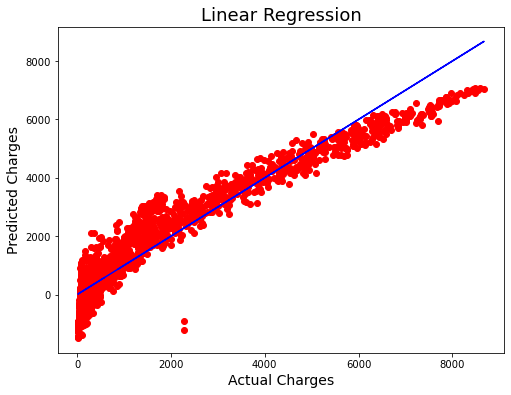

In [69]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

BEst fit line covering the most of datapoints which shows good fit of our model

In [70]:
from sklearn.linear_model import Lasso,Ridge

In [71]:
ls=Lasso(alpha=0.0001)
#ls=lasso(alpha=1.0)  #default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9042950584790025

In [72]:
ls.coef_

array([-2.40632019e-03,  2.02539279e+01, -8.30213072e+00,  5.40974975e+00,
       -4.01400135e+01,  5.98766986e+01, -4.55558628e+01,  4.47276290e+01,
       -1.52518110e+01,  1.10936997e+02,  1.29299440e+02,  9.81632873e+01,
        1.04474455e+02,  4.69936179e+01,  4.97642760e+01, -8.17653175e+01,
       -1.63773353e+01,  5.11779086e+01,  3.51077780e+01, -1.91891106e+02])

In [73]:
rd=Ridge(alpha=0.0001)
#rd=ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.904295058479142

In [74]:
rd.coef_

array([-2.40632127e-03,  2.02543188e+01, -8.30314545e+00,  5.41066604e+00,
       -4.01410597e+01,  5.98766950e+01, -4.55571300e+01,  4.47277601e+01,
       -1.52517730e+01,  1.10937102e+02,  1.29299552e+02,  9.81633625e+01,
        1.04474552e+02,  4.69937404e+01,  4.97643797e+01, -8.17658406e+01,
       -1.63778329e+01,  5.11780038e+01,  3.51077814e+01, -1.91891712e+02])

In [75]:
##elasticNet is a combination of both lasso and ridge

from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
##enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.9042950582841439


array([-2.40619124e-03,  2.02502754e+01, -8.29950358e+00,  5.40302982e+00,
       -4.01253531e+01,  5.98769770e+01, -4.55179932e+01,  4.47240861e+01,
       -1.52598444e+01,  1.10931201e+02,  1.29293019e+02,  9.81585193e+01,
        1.04469274e+02,  4.69920086e+01,  4.97625081e+01, -8.17432724e+01,
       -1.63764658e+01,  5.11752925e+01,  3.51075365e+01, -1.91826915e+02])

In [76]:
from sklearn.svm import SVR

In [77]:
svr=SVR(kernel="linear")
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

In [81]:
from sklearn.svm import SVR

kernellist=['linear']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.8961724158468525
